In [16]:
# Rohin Mohanadas
# Tracy task 2
# 9/20/2017

%matplotlib notebook
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.covariance import EllipticEnvelope
from sklearn import svm
from mpl_toolkits.mplot3d import Axes3D

In [24]:
df = pd.read_csv('/home/tracy/notebooks/rohin/data/data.csv',usecols=[0,1,2,6])

In [10]:
### There were data issues in the csv which was possibly resulting from the merging.
### Installed dos2unix
### Using SKlearns Outlier Detection APIs: EllipticEnvelope

In [25]:
EE = EllipticEnvelope(contamination=0.1)
arr = np.column_stack((df['xAcc'].tolist(),df['yAcc'].tolist(),df['zAcc'].tolist()))
fullarr = np.column_stack((df['xAcc'].tolist(),df['yAcc'].tolist(),df['zAcc'].tolist(),df['superpattern'].tolist()))
arr.shape
EE.fit(X=arr)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

In [37]:
fullarr[:,-1]

array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

In [26]:
corrected = EE.correct_covariance(data=arr)
# calculate mahalanobis distance of each data point
maha = EE.mahalanobis(arr)
ans = np.where(maha<700)
newans = fullarr[ans]
X = newans[:,0:3]
y = newans[:,3]
# Creating training to test with ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
### Visualization of Raw data

<IPython.core.display.Javascript object>


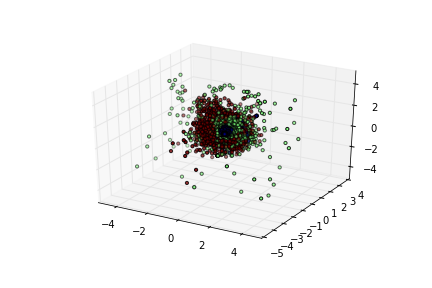

In [130]:
fig = plt.figure()
bx = fig.add_subplot(111, projection='3d')
bx.scatter(xs=df['xAcc'],ys=df['yAcc'],zs=df['zAcc'], zdir='z', s=10, c=df['superpattern']) 

In [ ]:
### Data filtered using mahalanobis distance

<IPython.core.display.Javascript object>


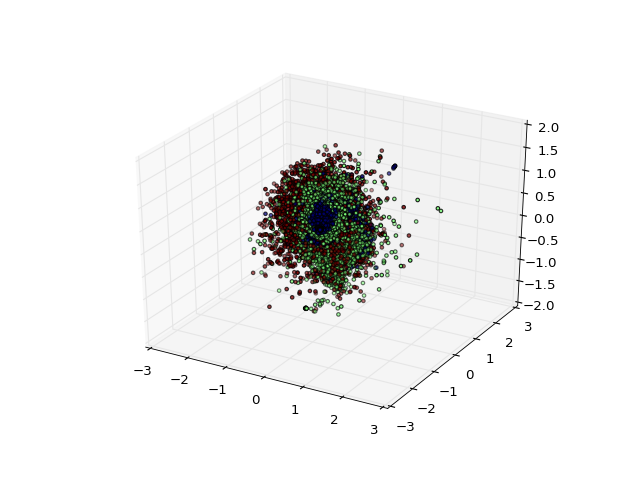

In [28]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=newans[:,0],ys=newans[:,1],zs=newans[:,2], zdir='z', s=10, c=newans[:,3]) 

In [33]:
clf = RandomForestClassifier(min_samples_leaf=20)
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print("Random Forest: training time", end - start, "seconds with test accuracy: ",clf.score(X_test,y_test)*100,"%")

Random Forest: training time 3.804133176803589 seconds with test accuracy:  90.6119044509 %
